# *Multi-Output: Wine Quality Estimator & Type Predictor*

### Classification as well as Regression using Functional Model

## Wine-Quality-Estimator-Type-Predictor
### Dataset: Wine Quality Dataset

Wine-Quality-Dataset

The wine quality has two available dataset, one for white wine and one for the red wine. 
Each dataset can be used to predict the quality of the wine based on the wine features.
The two dataset are combined and another column is added that indicates if it is a red wine or white wine.

This model takes the wine features and release **two outputs: the wine quality and the wine type.**

## *Dataset Information:*
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

*<b>These datasets can be viewed as classification or regression tasks.The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, it is not confirmed if all input variables are relevant.</b>*

So it is good to do some basic analysis of the data

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

## 1. Importing useful libraries

In [1]:
# Core python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Scikit learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import os
import zipfile


In [3]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

## 2. Preprocess Datasets

This dataset is good from eda perspective as well. Here u r combining two datasets.

### *White Wine Dataset*

In [4]:
# White wine dataset 
white_df = pd.read_csv("datasets/winequality-white.csv", sep=';')
white_df["is_red"] = 0
white_df.drop_duplicates(keep='first', inplace=True)
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [5]:
white_df.size

51493

### *Red Wine Dataset*

In [6]:
# Red Wine dataset
red_df = pd.read_csv("datasets/winequality-red.csv")
red_df["is_red"] = 1
red_df.drop_duplicates(keep='first', inplace=True)
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
red_df.size

17667

We observe that white wine data(51493) is quite high compared to red wine data (17667).

### Concatenate Datasets

In [8]:
df = pd.concat([red_df, white_df], ignore_index=True)
df.sample(5)   # df.sample takes random samples

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
2628,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.6,7,0
428,9.3,0.39,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.2,6,1
687,10.8,0.89,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2,5,1
2771,6.6,0.26,0.31,4.8,0.138,41.0,168.0,0.99510,3.20,0.38,9.3,5,0
4643,5.7,0.25,0.26,12.5,0.049,52.5,120.0,0.99691,3.08,0.45,9.4,6,0


In [9]:
df.size

69160

In [10]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
5319,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


### *Wine Quality Plot*

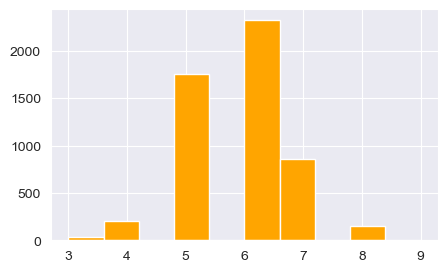

In [11]:
plt.figure(figsize=(5,3))
sns.set_style(style="darkgrid")
plt.hist(df["quality"], color="orange")
plt.show();

#### *From the above plot, the wines with 3,4,8 & 9 have low number of examples but other have a good number of samples; thus removing the 3,4,8 & 9 samples.*

In [12]:
df.value_counts(df['quality'])

quality
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
dtype: int64

- We can notice in wine quality from 0 to 10, very high or very low quality wines are less. Most in number are average quality wines.
- For this problem we have removed v.high & v.low quality wines.

*<b>Although this is part of eda but this will be v.useful for ML as well cz they will help us in reducing the number of features.</b>*

In [13]:
df = df[(df['quality']>4) & (df['quality']<8)]
df = df.reset_index(drop=True)
df.value_counts(df['quality'])

quality
6    2323
5    1752
7     856
dtype: int64

In [14]:
df['fixed acidity'].size

4931

### *Plot after processing*

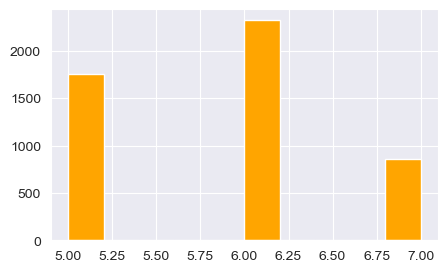

In [15]:
plt.figure(figsize=(5,3))
sns.set_style(style="darkgrid")
plt.hist(df["quality"], color="orange")
plt.show()

## *Train Test Split of the data*

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [17]:
df.size

64103

### Feature matrix

In [18]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [19]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4926,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4927,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4928,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4929,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### Target Vector - quality (for regression) and type(for classification)

Wine quality is a continuous variable that can take on any value in the range from 0 to 10, including fractions.

In [20]:
y = df[['quality', 'is_red']]
y.sample(5)

,quality,is_red
2656,6,0
692,5,1
4031,5,0
2834,7,0
1548,6,0


More than 2 o/p's also possible in functional model.

In [21]:
y = df[['quality', 'is_red']]
y.head()

,quality,is_red
0,5,1
1,5,1
2,5,1
3,6,1
4,5,1


In [22]:
y.size

9862

*Since this dataset was big enough so we have taken validation also apart from train & test set.* **Train samples > Validation samples > Test samples**

In [23]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
print(train_x.size)
print(test_x.size)

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)
print(val_x.size)


43384
10857
8679


In [24]:
train_x[0:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


## *train_x, train_y, test_x, test_y, val_x, val_y: Are all the sets created*

## *Normalization*

In [25]:
train_stats = train_x.describe().transpose()

In [26]:
# train_x.mean()

In [27]:
# train_x.std()

In [28]:
# Normalize

norm_train_x = (train_x - train_x.mean())/train_x.std()
norm_train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,0.210054,1.914565,-0.956741,0.397464,0.842996,-0.196591,-0.371425,1.503235,0.972264,1.581966,-0.956534
3557,-0.695404,-0.424239,-0.213347,1.518243,-0.352585,1.659904,1.427306,1.060647,-0.515907,-0.898768,-1.476170
3825,1.190966,-0.424239,-0.483672,-0.033604,-0.896032,1.253796,-0.283252,-0.709707,-2.190100,-0.295346,0.775586
1740,-0.619949,0.683616,-1.700136,-0.874188,-0.732998,-1.182853,0.281056,-1.375253,-1.570029,-1.703331,0.255950
1221,-0.016311,1.175995,-1.294648,-0.680207,0.027827,-0.718730,-1.641119,0.365151,-0.081857,0.978544,-0.523504


In [29]:
norm_val_x = (val_x - train_x.mean())/train_x.std()
norm_val_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4149,0.134599,-0.731976,-0.348510,-0.766421,0.000655,0.847688,-0.300887,-0.546648,0.414200,-0.630581,-0.523504
4340,-0.846313,-0.547333,-0.280928,1.044067,-0.053690,1.485858,0.281056,-0.210547,-0.019850,-1.234002,0.342556
2045,-0.619949,-0.362691,0.597629,0.354358,-0.325413,1.775935,1.779999,0.188781,-0.825943,-0.496487,-0.956534
1966,-0.846313,-0.362691,0.192141,1.647564,-0.243896,1.891966,2.009249,0.954159,-0.887950,-0.898768,-1.389564
3452,-0.242675,0.375878,-0.145766,1.173388,-0.651481,-0.370637,-0.494868,-0.659791,-0.453900,-0.563534,1.988071


In [30]:
norm_test_x = (test_x - train_x.mean())/train_x.std()
norm_test_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2372,-0.242675,-0.670428,-0.551254,1.949312,-0.108035,-0.660714,-0.371425,1.187100,-0.329886,-0.228299,-0.783322
1900,-0.469039,-0.793523,-0.078184,1.345815,-0.488447,0.905703,0.880633,1.103907,1.158285,-0.630581,-0.610110
275,1.266420,0.560521,0.867954,-0.701761,-0.135207,-1.414915,-1.746926,0.055672,0.786243,1.112638,1.728253
3276,-0.619949,2.099207,-0.416091,-0.378459,0.326722,-0.312622,0.545575,-0.386917,-0.267879,-0.898768,-1.043140
2360,-0.469039,-0.670428,-0.416091,-0.831081,-0.325413,-0.834761,0.228152,-0.410211,0.848250,0.442169,-0.436898


## *Model Development*

In [31]:
# Initialize base model
def base_model(inputs):
    x = Dense(128, activation = 'relu', name = "First_Dense")(inputs)
    x = Dense(128, activation = 'relu', name='Second_Dense')(x)
    return x

In [32]:
def final_model(inputs):
    x = base_model(inputs)
    # Output layers
    
    wine_quality = Dense(1, name='Wine_Quality')(x)
    wine_type = Dense(1, activation='sigmoid', name="Wine_Type")(x)
    model = Model(inputs = inputs, outputs =[wine_quality, wine_type])
    return model

## *Compile the model*

In [33]:
inputs = Input(shape=(11,))
model = final_model(inputs)

2023-04-02 08:28:28.697082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


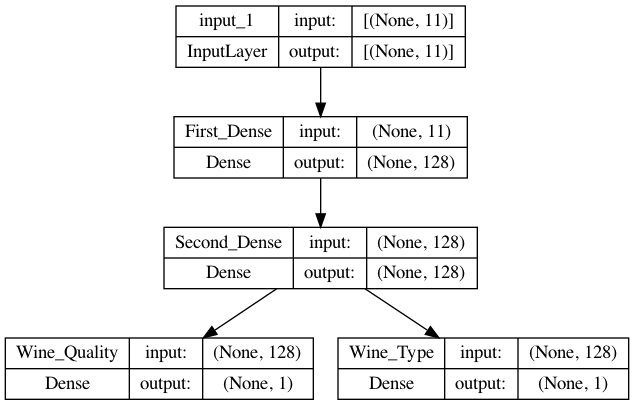

In [34]:
keras.utils.plot_model(model, show_shapes= True, show_layer_names=True)

In [35]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate= 0.0001), 
              loss = {'Wine_Type':'binary_crossentropy',
                      'Wine_Quality': 'mean_squared_error'},
              metrics = {'Wine_Type': 'accuracy',
                         'Wine_Quality': tf.keras.metrics.RootMeanSquaredError()},
             )

# Metrics & loss defined as per classification & regression problem.

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 First_Dense (Dense)            (None, 128)          1536        ['input_1[0][0]']                
                                                                                                  
 Second_Dense (Dense)           (None, 128)          16512       ['First_Dense[0][0]']            
                                                                                                  
 Wine_Quality (Dense)           (None, 1)            129         ['Second_Dense[0][0]']           
                                                                                              

## *Train the model*

In [37]:
is_red = train_y['is_red']
is_red = np.array(is_red)
quality = train_y['quality']
quality = np.array(quality)
train_y = (quality, is_red)

In [38]:
train_y

(array([5, 6, 5, ..., 6, 5, 5]), array([1, 0, 0, ..., 1, 1, 0]))

In [39]:
is_red = val_y['is_red']
is_red = np.array(is_red)
quality = val_y['quality']
quality = np.array(quality)
val_y = (quality, is_red)

In [40]:
is_red = test_y['is_red']
is_red = np.array(is_red)
quality = test_y['quality']
quality = np.array(quality)
test_y = (quality, is_red)

In [41]:
history = model.fit(norm_train_x, train_y, 
                    epochs=10, 
                    validation_data=(norm_val_x, val_y))

Epoch 1/10
99/99 [==============================] - 1s 3ms/step - loss: 23.6802 - Wine_Quality_loss: 23.0437 - Wine_Type_loss: 0.6364 - Wine_Quality_root_mean_squared_error: 4.8004 - Wine_Type_accuracy: 0.7360 - val_loss: 16.3626 - val_Wine_Quality_loss: 15.7349 - val_Wine_Type_loss: 0.6277 - val_Wine_Quality_root_mean_squared_error: 3.9667 - val_Wine_Type_accuracy: 0.7326
Epoch 2/10
99/99 [==============================] - 0s 1ms/step - loss: 10.6708 - Wine_Quality_loss: 10.0717 - Wine_Type_loss: 0.5991 - Wine_Quality_root_mean_squared_error: 3.1736 - Wine_Type_accuracy: 0.7436 - val_loss: 6.2298 - val_Wine_Quality_loss: 5.6574 - val_Wine_Type_loss: 0.5724 - val_Wine_Quality_root_mean_squared_error: 2.3785 - val_Wine_Type_accuracy: 0.7338
Epoch 3/10
99/99 [==============================] - 0s 1ms/step - loss: 4.3329 - Wine_Quality_loss: 3.8124 - Wine_Type_loss: 0.5204 - Wine_Quality_root_mean_squared_error: 1.9525 - Wine_Type_accuracy: 0.7458 - val_loss: 3.2269 - val_Wine_Quality_loss

## *Analyze Model's performance*

In [42]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_x, y=val_y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')


25/25 [==============================] - 0s 643us/step - loss: 1.2454 - Wine_Quality_loss: 1.1517 - Wine_Type_loss: 0.0937 - Wine_Quality_root_mean_squared_error: 1.0732 - Wine_Type_accuracy: 0.9886

loss: 1.2453603744506836
wine_quality_loss: 1.1516590118408203
wine_type_loss: 0.09370137751102448
wine_quality_rmse: 1.0731537342071533
wine_type_accuracy: 0.9885931611061096


In [43]:
predictions = model.predict(norm_test_x)
quality_preds = predictions[0]
type_preds = predictions[1]

31/31 [==============================] - 0s 536us/step


### *Plot utilities*

In [44]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()
    
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

## *Metrics Plots* 

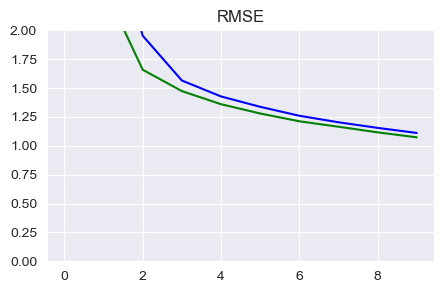

In [45]:
plt.figure(figsize=(5,3))

plot_metrics('Wine_Quality_root_mean_squared_error', 'RMSE', ylim=2)

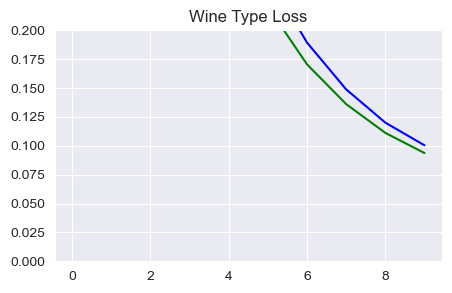

In [46]:
plt.figure(figsize=(5,3))

plot_metrics('Wine_Type_loss', 'Wine Type Loss', ylim=0.2)

## *Confusion Matrix*

/var/folders/1j/6bqwtp0x00z_279498pht7ym0000gn/T/ipykernel_20246/1399773686.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/1j/6bqwtp0x00z_279498pht7ym0000gn/T/ipykernel_20246/1399773686.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


<Figure size 500x300 with 0 Axes>

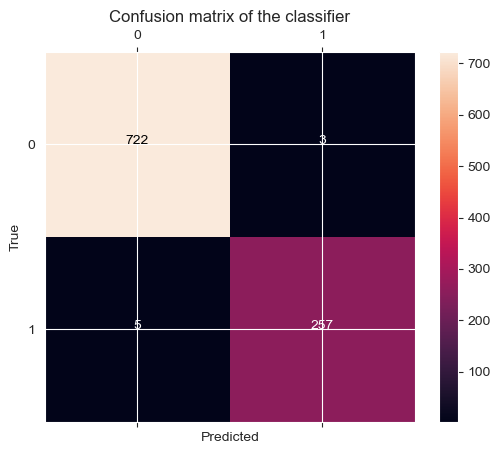

In [47]:
plt.figure(figsize=(5,3))

plot_confusion_matrix(test_y[1], np.round(type_preds), title='Wine Type', labels = [0, 1])

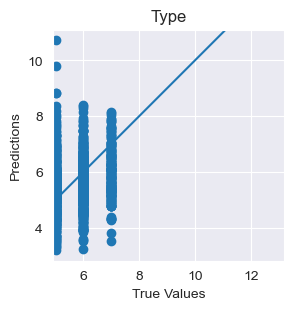

In [48]:
plt.figure(figsize=(5,3))
scatter_plot = plot_diff(test_y[0], quality_preds, title='Type')

Note that we had only 3 values of quality in dataset (5,6,7) rest we removed cz they were creating biasness in data.